# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [84]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
from scipy import stats

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [85]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")


Number of cities in the list: 605


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [86]:
# Set the API base URL

# Define an empty list to fetch the weather data for each city
city_data = []
# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city

    url = f'https://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=metric&q={city}'
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        # Append the City information into city_data list
        city_data.append({"City": city_weather['name'], 
                          "Lat": city_weather['coord']['lat'], 
                          "Lng": city_weather['coord']['lon'], 
                          "Max Temp": city_weather['main']['temp_max'],
                          "Humidity": city_weather['main']['humidity'],
                          "Cloudiness": city_weather['clouds']['all'],
                          "Wind Speed": city_weather['wind']['speed'],
                          "Country": city_weather['sys']['country'],
                          "Date": city_weather['dt']})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | myanaung
Processing Record 2 of Set 1 | cherskiy
Processing Record 3 of Set 1 | cabo san lucas
Processing Record 4 of Set 1 | georgetown
Processing Record 5 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 6 of Set 1 | ilulissat
Processing Record 7 of Set 1 | thompson
Processing Record 8 of Set 1 | vila franca do campo
Processing Record 9 of Set 1 | hobart
Processing Record 10 of Set 1 | hermanus
Processing Record 11 of Set 1 | jamestown
Processing Record 12 of Set 1 | amderma
City not found. Skipping...
Processing Record 13 of Set 1 | hay river
Processing Record 14 of Set 1 | stornoway
Processing Record 15 of Set 1 | muzhi
Processing Record 16 of Set 1 | novomichurinsk
Processing Record 17 of Set 1 | ternate
Processing Record 18 of Set 1 | aksarka
Processing Record 19 of Set 1 | teahupoo
Processing Record 20 of Set 1 | albany
Processing Record 21 of Set 1 | souillac
Processin

In [87]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          551
Lat           551
Lng           551
Max Temp      551
Humidity      551
Cloudiness    551
Wind Speed    551
Country       551
Date          551
dtype: int64

In [88]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Myanaung,18.2833,95.3167,31.23,36,63,1.81,MM,1680059482
1,Cherskiy,68.7500,161.3000,-7.69,77,100,8.94,RU,1680059482
2,Cabo San Lucas,22.8909,-109.9124,21.95,61,40,1.54,MX,1680059483
3,George Town,5.4112,100.3354,30.96,74,20,2.57,MY,1680059483
4,Ilulissat,69.2167,-51.1000,-27.42,89,5,2.24,GL,1680059484


In [89]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [90]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,Myanaung,18.2833,95.3167,31.23,36,63,1.81,MM,1680059482
1,Cherskiy,68.7500,161.3000,-7.69,77,100,8.94,RU,1680059482
2,Cabo San Lucas,22.8909,-109.9124,21.95,61,40,1.54,MX,1680059483
3,George Town,5.4112,100.3354,30.96,74,20,2.57,MY,1680059483
4,Ilulissat,69.2167,-51.1000,-27.42,89,5,2.24,GL,1680059484


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

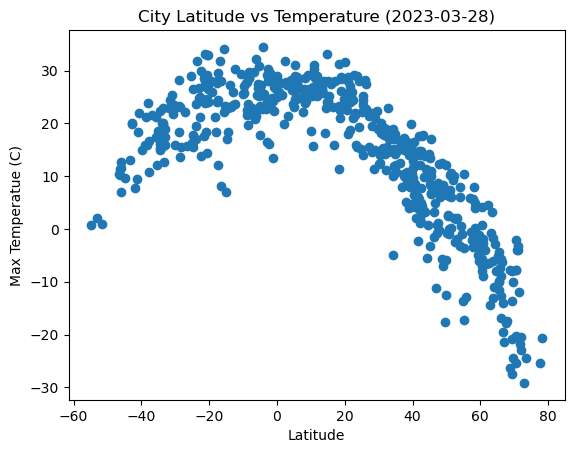

In [91]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker ="o")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperatue (C)")
plt.title("City Latitude vs Temperature (2023-03-28)")

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

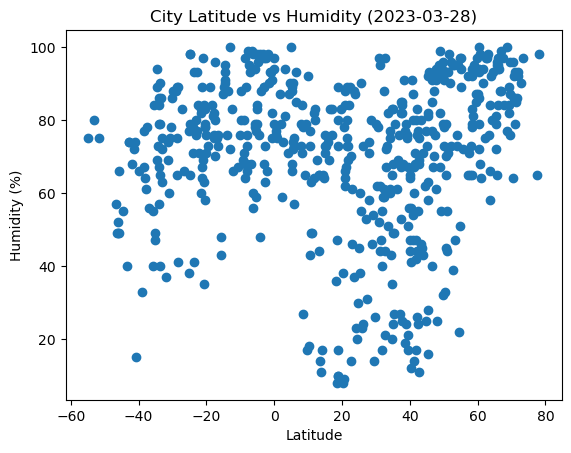

In [92]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker ="o")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs Humidity (2023-03-28)")

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

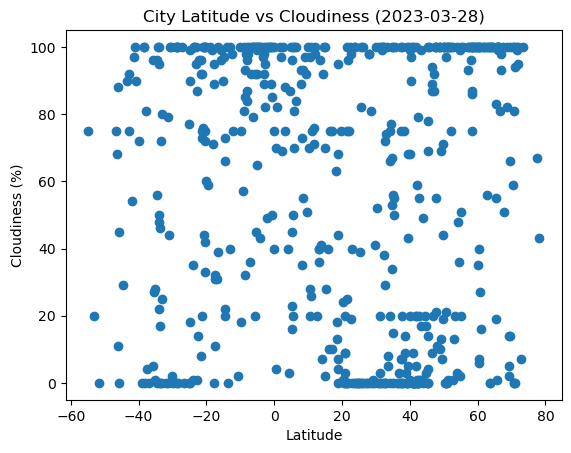

In [93]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker ="o")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs Cloudiness (2023-03-28)")

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

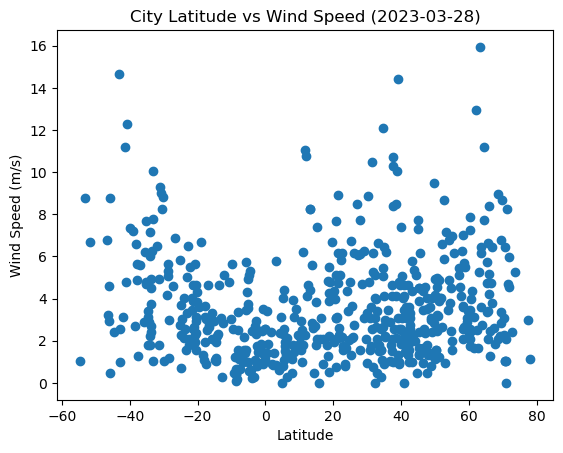

In [94]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker ="o")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude vs Wind Speed (2023-03-28)")

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [111]:
# Define a function to create Linear Regression plots
def lin_regression(x,y,title):
    plt.scatter(x,y)
    plt.xlabel("Latitude")
    plt.ylabel(title)
    (slope,intercept,rvalue,pvalue,stderr) = stats.linregress(x,y)
    regress_values = x*slope + intercept
    line_eq =  "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    plt.plot(x,regress_values,"r")
    plt.annotate(line_eq,(20,15),fontsize=15,color="red")
    print(f"The r-value is: {rvalue**2}")
    plt.show()

In [113]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"]>=0),["City","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed","Country","Date"]]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,Myanaung,18.2833,95.3167,31.23,36,63,1.81,MM,1680059482
1,Cherskiy,68.7500,161.3000,-7.69,77,100,8.94,RU,1680059482
2,Cabo San Lucas,22.8909,-109.9124,21.95,61,40,1.54,MX,1680059483
3,George Town,5.4112,100.3354,30.96,74,20,2.57,MY,1680059483
4,Ilulissat,69.2167,-51.1000,-27.42,89,5,2.24,GL,1680059484


In [116]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"]<=0),["City","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed","Country","Date"]]

# Display sample data
southern_hemi_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
7,Hobart,-42.8794,147.3294,20.14,74,75,2.57,AU,1680059485
8,Hermanus,-34.4187,19.2345,14.89,73,100,2.90,ZA,1680059485
16,Teahupoo,-17.8333,-149.2667,27.98,76,95,3.66,PF,1680059488
18,Souillac,-20.5167,57.5167,24.57,79,72,2.38,MU,1680059489
21,Carutapera,-1.1950,-46.0200,24.16,93,100,1.84,BR,1680059492
...,...,...,...,...,...,...,...,...,...
539,Pisco,-13.7000,-76.2167,23.03,88,0,4.63,PE,1680059687
540,Otane,-39.8833,176.6333,15.01,66,72,7.33,NZ,1680059713
544,Bowen,-20.0167,148.2333,27.98,71,60,4.32,AU,1680059714


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.8171056751217232


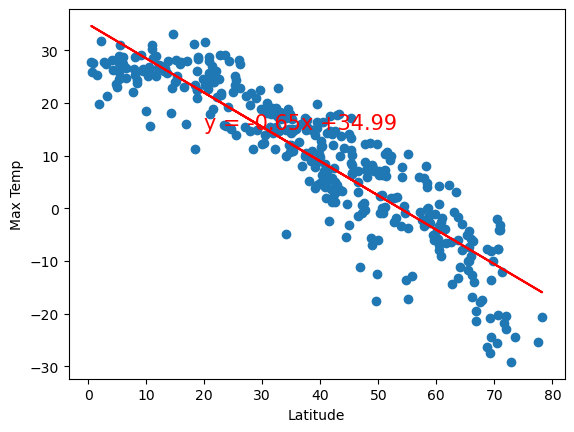

In [112]:
# Linear regression on Northern Hemisphere
lin_regression(northern_hemi_df['Lat'],northern_hemi_df['Max Temp'], "Max Temp")

The r-value is: 0.38188658309911144


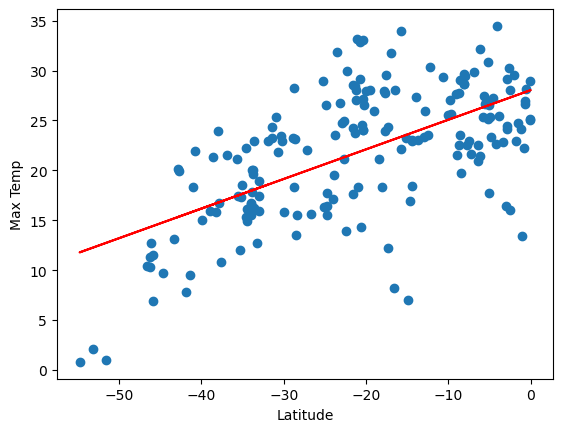

In [118]:
# Linear regression on Southern Hemisphere
lin_regression(southern_hemi_df['Lat'],southern_hemi_df['Max Temp'], "Max Temp")

**Discussion about the linear relationship:** There is a stronger linear correlation between Latitude and Max Temp for the Northern Hemisphere as r=0.82 compared to the Southern Hempishere of r=0.38. The Northern Hemisphere would have a strong correlation while the Southern would have a weak correlation. The overall general trend for latitude and max temp for the Northern Hemisphere is a negative correlation as the further you go away from the equator the colder it gets. The overall trend for latitude an max temp for the Southern Hemisphere is a positive correlation as the closer you get to the equator the warmer it gets. There was no negative max temperatures found in Southern Hemisphere, where there was some found in the Northern Hemisphere. zi
 

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.08269714560257475


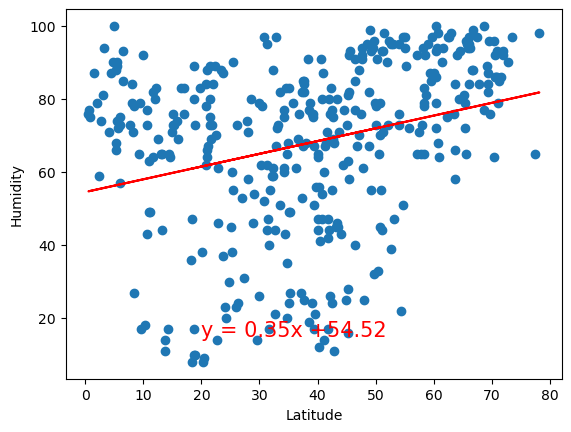

In [119]:
# Northern Hemisphere
lin_regression(northern_hemi_df['Lat'],northern_hemi_df['Humidity'], "Humidity")

The r-value is: 0.17880864281165784


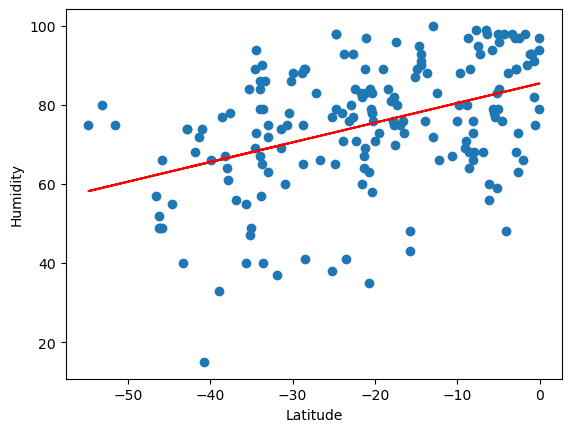

In [121]:
# Southern Hemisphere
lin_regression(southern_hemi_df['Lat'],southern_hemi_df['Humidity'], "Humidity")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.01227039458887481


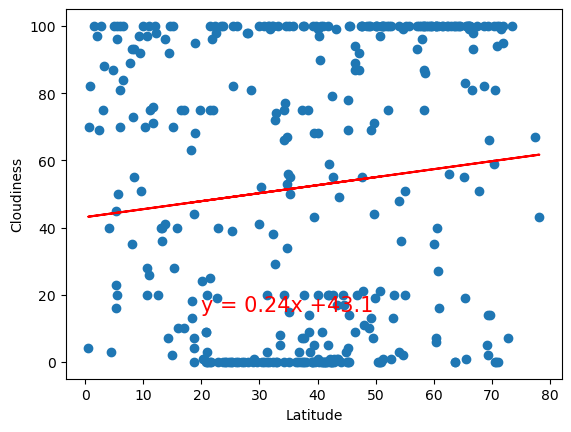

In [122]:
# Northern Hemisphere
lin_regression(northern_hemi_df['Lat'],northern_hemi_df['Cloudiness'], "Cloudiness")

The r-value is: 0.11794633093488285


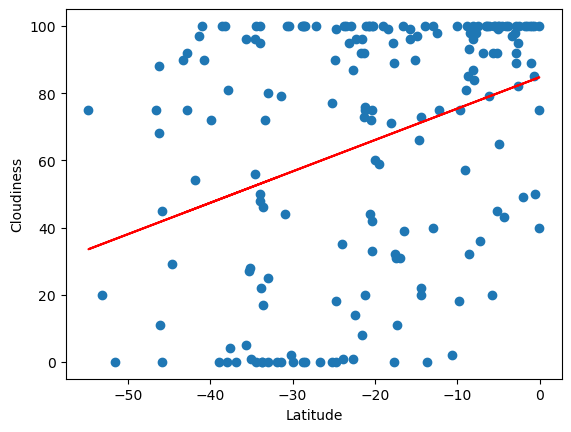

In [123]:
# Southern Hemisphere
lin_regression(southern_hemi_df['Lat'],southern_hemi_df['Cloudiness'], "Cloudiness")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.02723050378940505


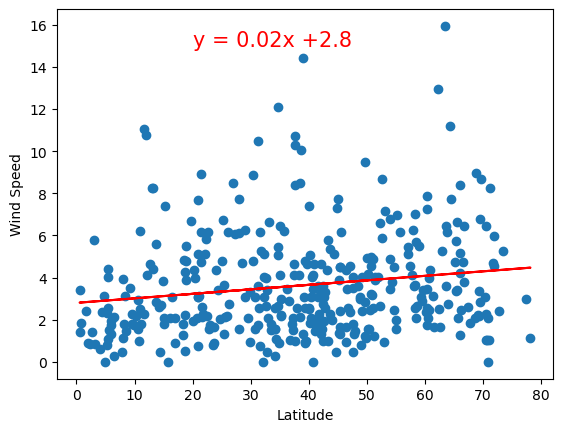

In [125]:
# Northern Hemisphere
lin_regression(northern_hemi_df['Lat'],northern_hemi_df['Wind Speed'], "Wind Speed")

The r-value is: 0.24381381433366528


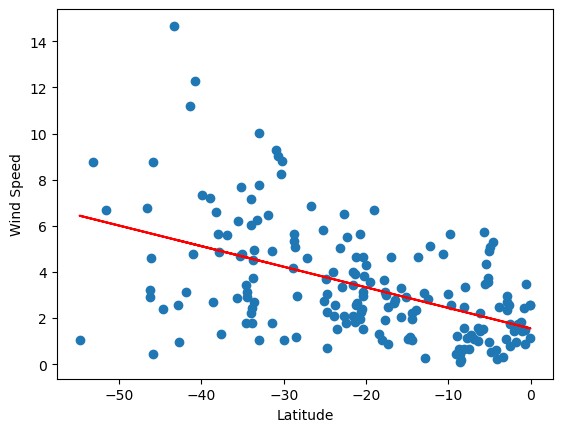

In [126]:
# Southern Hemisphere
lin_regression(southern_hemi_df['Lat'],southern_hemi_df['Wind Speed'], "Wind Speed")

**Discussion about the linear relationship:** YOUR RESPONSE HERE